In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# !pip install openpyxl

In [3]:
df_churn=pd.read_csv("Bank_Churn.csv")
df_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_churn.duplicated().sum()

np.int64(0)

In [12]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#### The percentage of churned

In [11]:
(df_churn.Exited==1).mean()

np.float64(0.2037)

#### Distribution of the numerical features

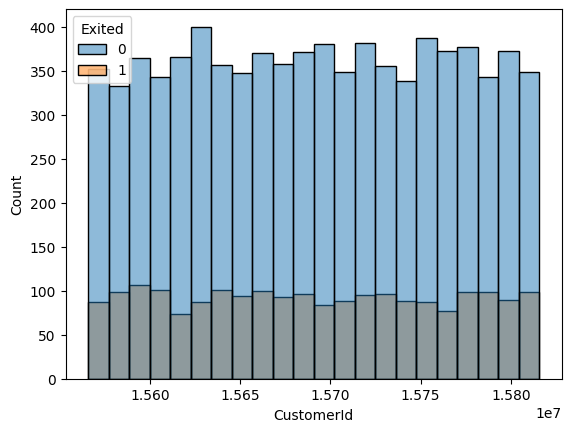

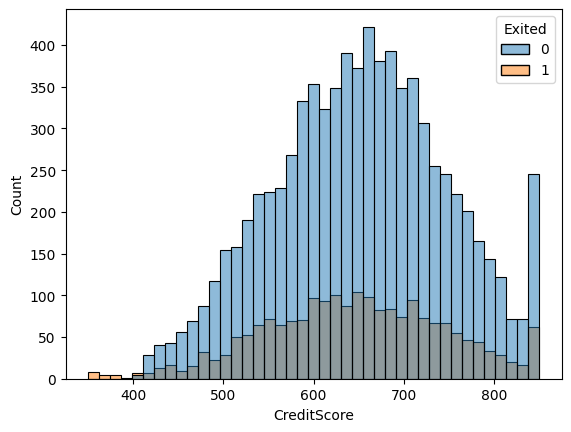

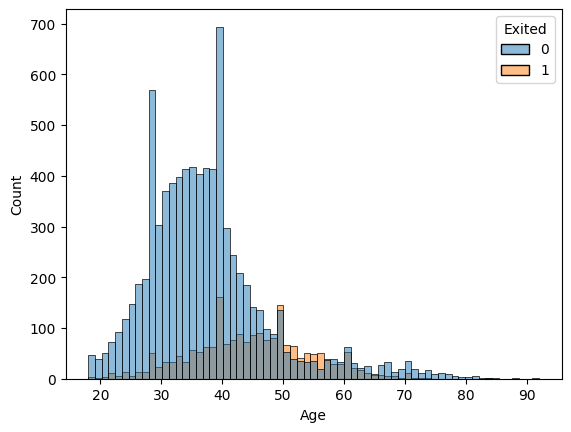

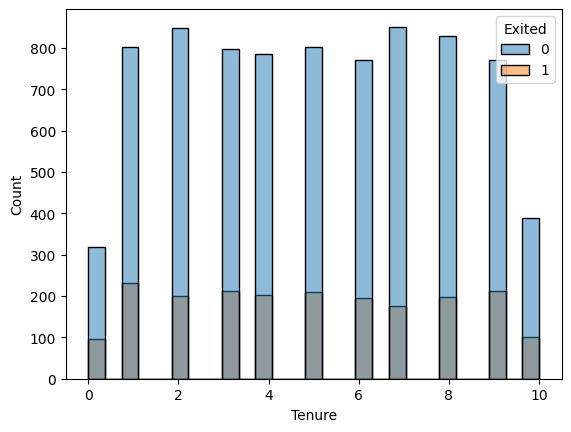

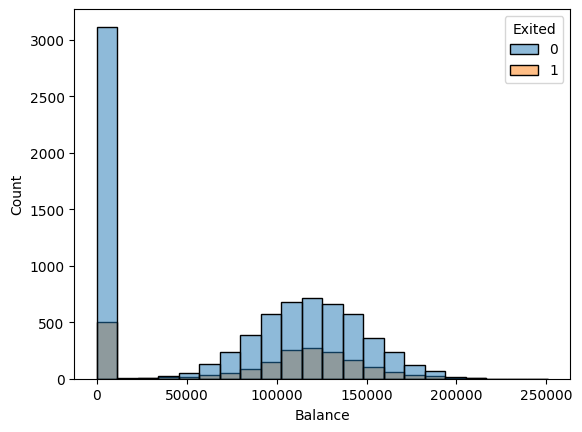

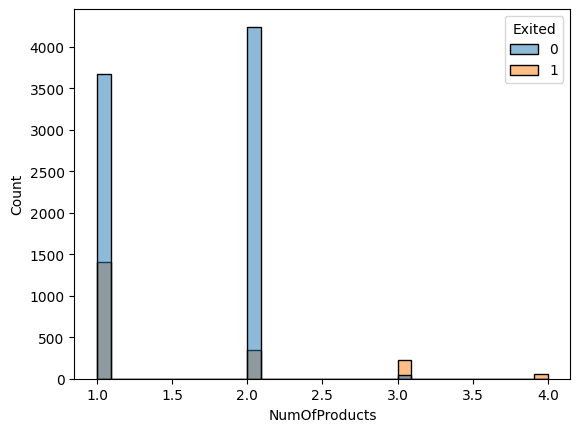

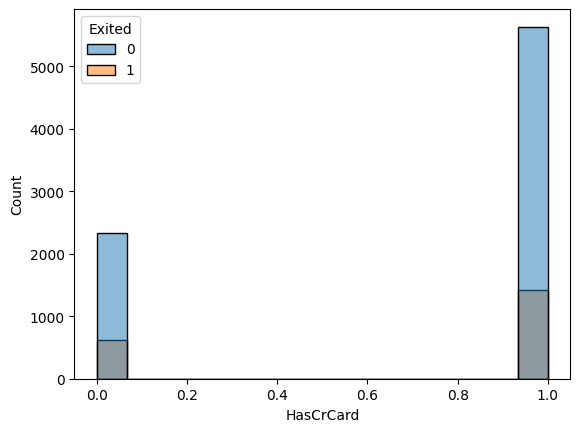

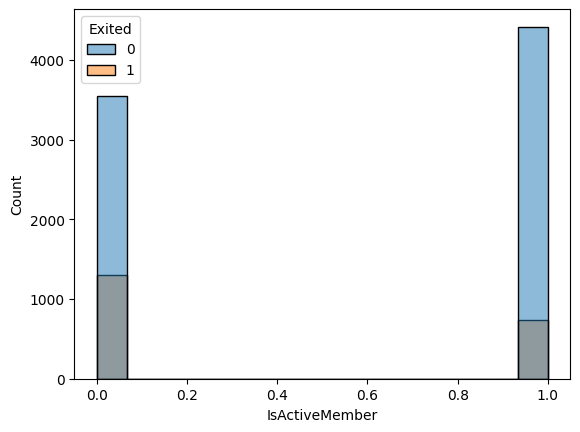

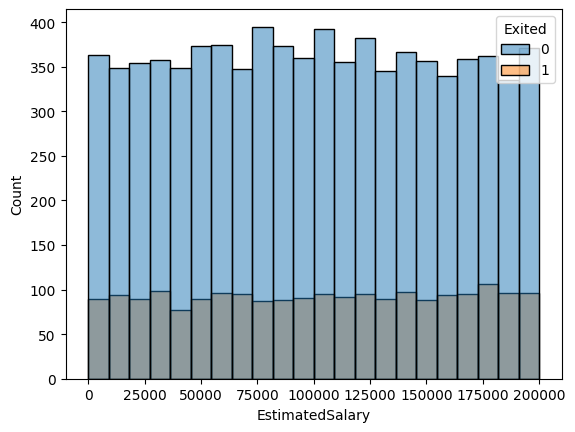

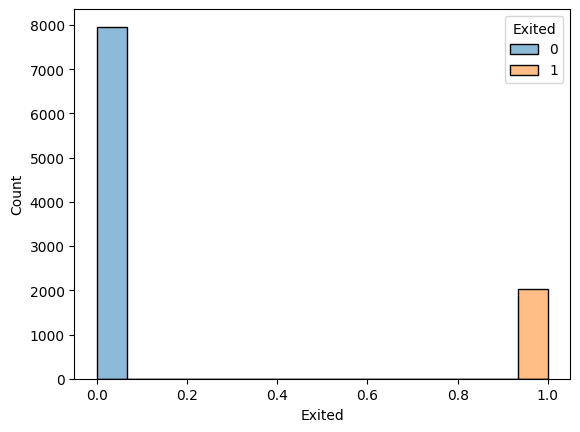

In [32]:
for col in df_churn.select_dtypes("number").columns:
    plt.figure()
    sns.histplot(data=df_churn,x=col,hue="Exited")
    plt.show()

In [34]:
# What's the percentage of churned and unchurned populatioin in each categorical columns?
lst_cat=df_churn.select_dtypes("object").columns.to_list()[1:]
lst_cat.extend(["Tenure","NumOfProducts","HasCrCard","IsActiveMember"])

In [35]:
print(lst_cat)

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


In [70]:
df_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Churn Rate For Each Nation

In [72]:
# Which country have the highest churn rate
geo=df_churn.groupby(["Geography"]).CustomerId.count().reset_index()
geo

,Geography,CustomerId
0,France,5014
1,Germany,2509
2,Spain,2477


In [107]:
geo_churn=df_churn.groupby(["Geography","Exited"]).CustomerId.count().unstack().reset_index()
geo_churn.columns=["Country","Unchurned","Churned"]
geo_churn["Total"]=geo_churn.Unchurned+geo_churn.Churned
geo_churn["Churned_Rate"]=(geo_churn.Churned/geo_churn.Total).round(4)
geo_churn

,Country,Unchurned,Churned,Total,Churned_Rate
0,France,4204,810,5014,0.1615
1,Germany,1695,814,2509,0.3244
2,Spain,2064,413,2477,0.1667


## Analysis

#### France has the most amount of customers around 5000 and twice as many as the customers in Germany and France which has around 2500 each. However, Germany has the highest churn rate at around 32%, comparing to 16% for France and spain.


### Churn Rate for Each Gender

In [38]:
df_churn.groupby("Gender").CustomerId.count()

Gender
Female    4543
Male      5457
Name: CustomerId, dtype: int64

In [119]:
gender_churn=df_churn.groupby(["Gender","Exited"]).CustomerId.count().unstack().reset_index().rename(columns={0:"Unchurned",1:"Churned"})
gender_churn["sum"]=gender_churn["Unchurned"]+gender_churn["Churned"]
gender_churn["churn_rate"]=(gender_churn.Churned/gender_churn["sum"]).round(4)
gender_churn

Exited,Gender,Unchurned,Churned,sum,churn_rate
0,Female,3404,1139,4543,0.2507
1,Male,4559,898,5457,0.1646


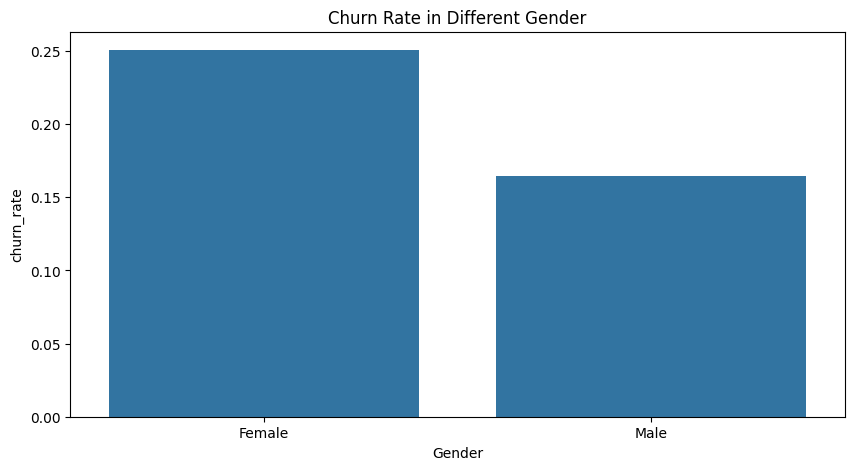

In [120]:
plt.figure(figsize=(10,5))
sns.barplot(gender_churn,x="Gender",y="churn_rate")
plt.title("Churn Rate in Different Gender")
plt.show()
    

## Analysis

#### Women has a 75% higher churn rate than men.

### Churn Rate for Tenure

In [41]:
df_churn.Tenure.value_counts()/df_churn.shape[0]

Tenure
2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: count, dtype: float64

In [42]:
tenure_churn=df_churn.groupby(["Tenure","Exited"])["Tenure"].value_counts().unstack()
tenure_churn["sum"]=tenure_churn.sum(axis=1)
tenure_churn

Exited,0,1,sum
Tenure,,,
0,318,95,413
1,803,232,1035
2,847,201,1048
3,796,213,1009
4,786,203,989
5,803,209,1012
6,771,196,967
7,851,177,1028
8,828,197,1025


In [121]:
tenure_churn["Unchurn_Rate"]=tenure_churn[0]/tenure_churn["sum"]
tenure_churn["Churned_Rate"]=tenure_churn[1]/tenure_churn["sum"]

In [123]:
tenure_churn

Exited,0,1,sum,0_percentage,1_percentage,Unchurn_Rate,Churned_Rate
Tenure,,,,,,,
0,318,95,413,0.769976,0.230024,0.769976,0.230024
1,803,232,1035,0.775845,0.224155,0.775845,0.224155
2,847,201,1048,0.808206,0.191794,0.808206,0.191794
3,796,213,1009,0.788900,0.211100,0.788900,0.211100
4,786,203,989,0.794742,0.205258,0.794742,0.205258
5,803,209,1012,0.793478,0.206522,0.793478,0.206522
6,771,196,967,0.797311,0.202689,0.797311,0.202689
7,851,177,1028,0.827821,0.172179,0.827821,0.172179
8,828,197,1025,0.807805,0.192195,0.807805,0.192195


## Analysis

#### The churn rate for different tenures spread pretty evenly across the tenures.

### Analyze the number of products

In [45]:
df_churn.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [124]:
products_churn=df_churn.groupby(["NumOfProducts","Exited"]).CustomerId.count().unstack()
products_churn["sum"]=products_churn.sum(axis=1)
products_churn["Unchurned_Rate"]=products_churn[0]/products_churn["sum"]
products_churn["Churned_Rate"]=products_churn[1]/products_churn["sum"]

In [125]:
products_churn

Exited,0,1,sum,Unchurned_Rate,Churned_Rate
NumOfProducts,,,,,
1,3675.0,1409.0,5084.0,0.722856,0.277144
2,4242.0,348.0,4590.0,0.924183,0.075817
3,46.0,220.0,266.0,0.172932,0.827068
4,NaN,60.0,60.0,NaN,1.000000


#### Insights: People with 3 and 4 products have a very high churn rate, but the population is low. People with one products also have significantly higher churn rate. People with two products have much lower churn rate.

### Analyze has credit card or not

In [162]:
def analyze(col):
    print(col)
    print(df_churn[col].value_counts())
    print("---------------")
    col_churn=df_churn.groupby([col,"Exited"]).CustomerId.count().unstack()
    col_churn["sum"]=col_churn.sum(axis=1)
    col_churn["Unchurned_Rate"]=col_churn[0]/col_churn["sum"]
    col_churn["Churned_Rate"]=col_churn[1]/col_churn["sum"]
    print(col_churn)

In [163]:
analyze("HasCrCard")

HasCrCard
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
---------------
Exited        0     1   sum  Unchurned_Rate  Churned_Rate
HasCrCard                                                
0          2332   613  2945        0.791851      0.208149
1          5631  1424  7055        0.798157      0.201843


#### Whether or not a customer has a credt card has no effects on churn rate.

#### Analyze IsActive member

In [164]:
analyze("IsActiveMember")

IsActiveMember
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
---------------
Exited             0     1   sum  Unchurned_Rate  Churned_Rate
IsActiveMember                                                
0               3547  1302  4849        0.731491      0.268509
1               4416   735  5151        0.857309      0.142691


#### Active member has a much lower churn rate than the none active member

## The categorical columns are related to churns are Geography,Gender, NumOfProducts, IsActiveMember.

## Numerical columns

In [52]:
df_churn.select_dtypes("number").columns[1:]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [53]:
col_num=["CreditScore","Age","Balance","EstimatedSalary"]

In [54]:
df_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [55]:
for i in col_num:
    print(i)
    print(df_churn.groupby("Exited")[i].mean())

CreditScore
Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64
Age
Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64
Balance
Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64
EstimatedSalary
Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


#### CreditScore vs Age

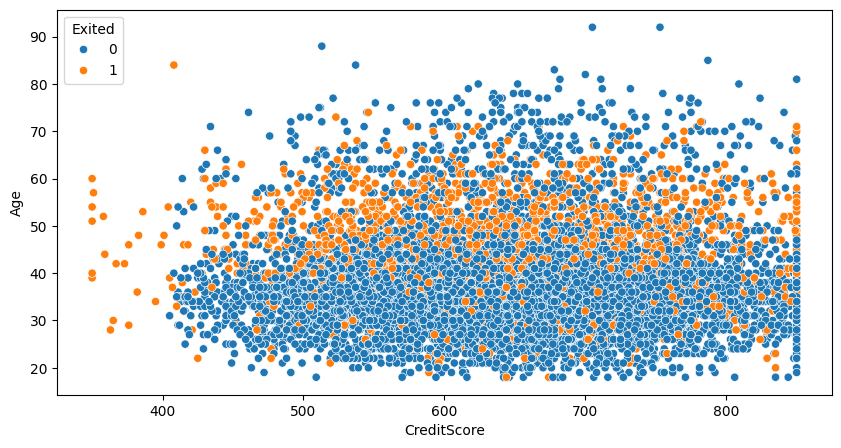

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_churn,x="CreditScore",y="Age",hue="Exited")
plt.show()

#### Most of the churned customers are concentrated between age of 40 and 65.

In [13]:
churn_rate=(df_churn.query("Age>40 and Age<65")["Exited"]==1).mean().round(4)
churn_total=(df_churn.query("Age>40 and Age<65")["Exited"]==1).sum()
print(f"For clients older than 40 and yonger than 65, the total churned is {churn_total}")
print(f"For clients older than 40 and yonger than 65, the churn rate is {churn_rate}")

For clients older than 40 and yonger than 65, the total churned is 1308
For clients older than 40 and yonger than 65, the churn rate is 0.3965


In [14]:
ct1=(df_churn.loc[~((df_churn.Age>40) & (df_churn.Age.lt(65))),"Exited"]==1).sum()
cr1=(df_churn.loc[~((df_churn.Age>40) & (df_churn.Age.lt(65))),"Exited"]==1).mean().round(4)
print(f"For clients younger than 40 and older than 65, the total churned is {ct1}")
print(f"For clients younger than 40 and older than 65, the churn rate is {cr1}")

For clients younger than 40 and older than 65, the total churned is 729
For clients younger than 40 and older than 65, the churn rate is 0.1088


## Analysis

#### The churn rate for people between 40 and 65 is 39.65% vs 13.08% the rest population. The credit below 400 had all churned.

### Age vs Country vs Churn



In [132]:
df_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
df_churn.groupby(["Geography","Exited"]).agg(age_mean=("Age","mean")).unstack().reset_index()

Geography   age_mean           
Exited                    0          1
0         France  37.235966  45.133333
1        Germany  37.311504  44.894349
2          Spain  37.839147  44.147700

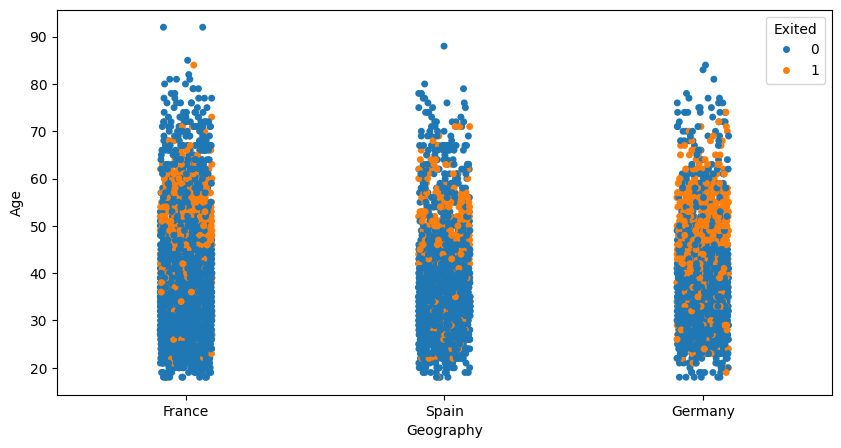

In [133]:
plt.figure(figsize=(10,5))
sns.stripplot(df_churn,x="Geography",y="Age",hue="Exited")
plt.show()

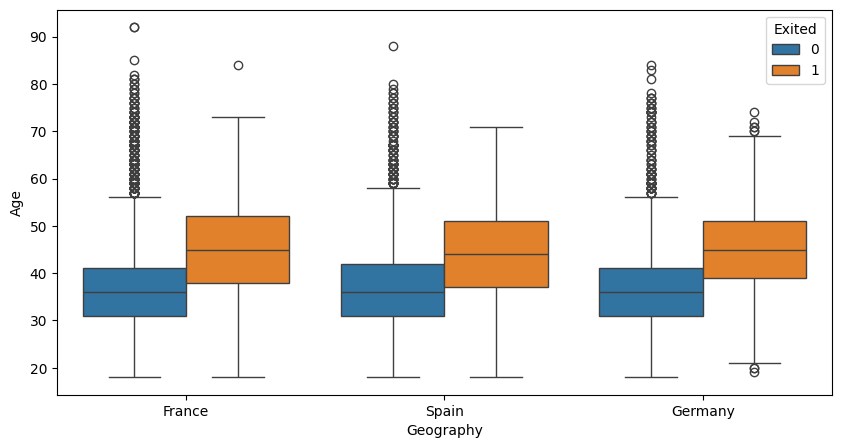

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(df_churn,x="Geography",y="Age",hue="Exited")
plt.show()

## Analysis

#### For each nation, the average age for the churned is higher than the unchurned. For Germany, It has more churn for all kind of age demographics. France and Spain have less churned under 45.

#### Age, IsActiveMember and Churn

In [168]:
df_churn.groupby(["IsActiveMember","Exited"]).Age.mean().unstack().rename({0:"Unchurned",1:"Churned"},axis=1)

Exited,Unchurned,Churned
IsActiveMember,,
0,35.471666,44.880184
1,38.963995,44.763265


<Axes: xlabel='IsActiveMember', ylabel='Age'>

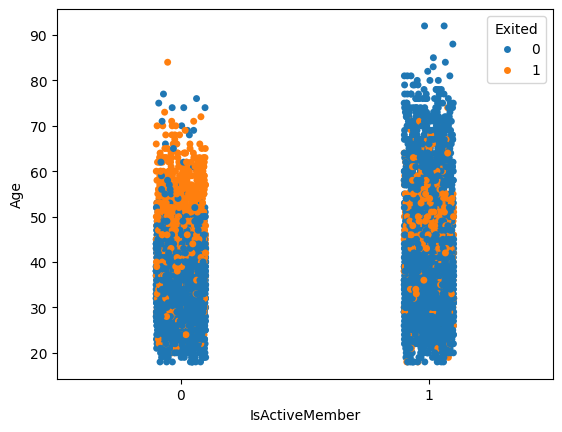

In [169]:
sns.stripplot(df_churn, x="IsActiveMember",y="Age",hue="Exited")

#### For active members, Churned cutomers had concentrated abve age of 505, for the active customers, it has concentrated between age of 40 and 60.

### Country, IsActive, Exited

In [179]:
df_churn.groupby(["Geography","Exited","IsActiveMember"])["Exited"].count().unstack()

IsActiveMember,0,1
Geography,,
France,2423,2591
Germany,1261,1248
Spain,1165,1312


In [185]:
for country in df_churn.Geography.unique().tolist():
    print(f"{country}")
    df=df_churn.query("Geography==@country").groupby(["IsActiveMember","Exited"]).CustomerId.count().unstack()
    df["Total"]=df[0]+df[1]
    df["Churned"]=df[1]/df["Total"]
    df["Unchurned"]=df[0]/df["Total"]
    print(df)
    print("------------------")

France
Exited             0    1  Total   Churned  Unchurned
IsActiveMember                                       
0               1911  512   2423  0.211308   0.788692
1               2293  298   2591  0.115014   0.884986
------------------
Spain
Exited             0    1  Total   Churned  Unchurned
IsActiveMember                                       
0                893  272   1165  0.233476   0.766524
1               1171  141   1312  0.107470   0.892530
------------------
Germany
Exited            0    1  Total   Churned  Unchurned
IsActiveMember                                      
0               743  518   1261  0.410785   0.589215
1               952  296   1248  0.237179   0.762821
------------------


### Age, Gender, and Churn

In [145]:
df_churn.groupby(["Gender","Exited"]).Age.mean().reset_index()

,Gender,Exited,Age
0,Female,0,37.382491
1,Female,1,44.784899
2,Male,0,37.427725
3,Male,1,44.905345


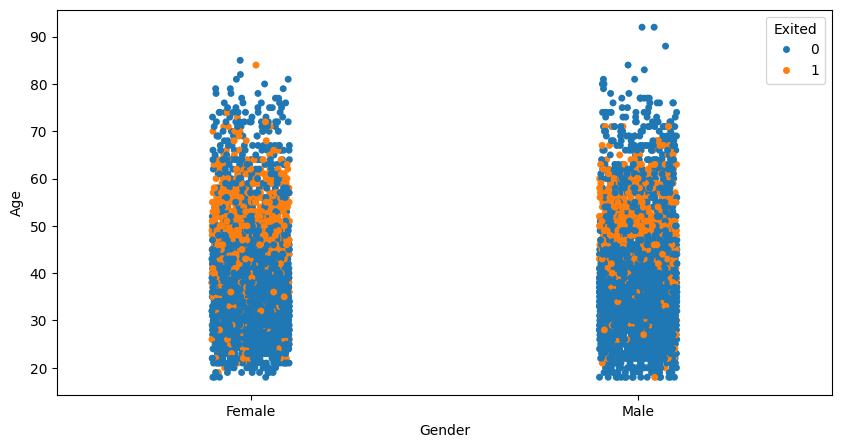

In [146]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df_churn,x="Gender",y="Age",hue="Exited")
plt.show()

#### No Pattern

## Age vs Balance

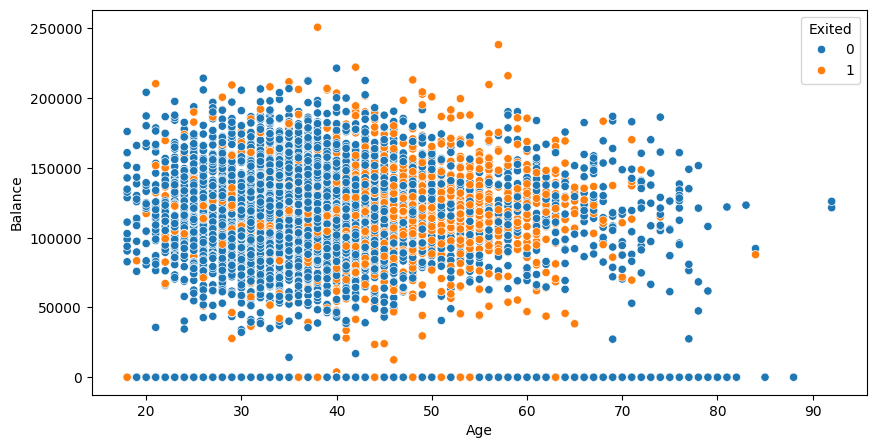

In [60]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_churn,x="Age",y="Balance",hue="Exited")
plt.show()

#### Balance vs EstimatedSalary

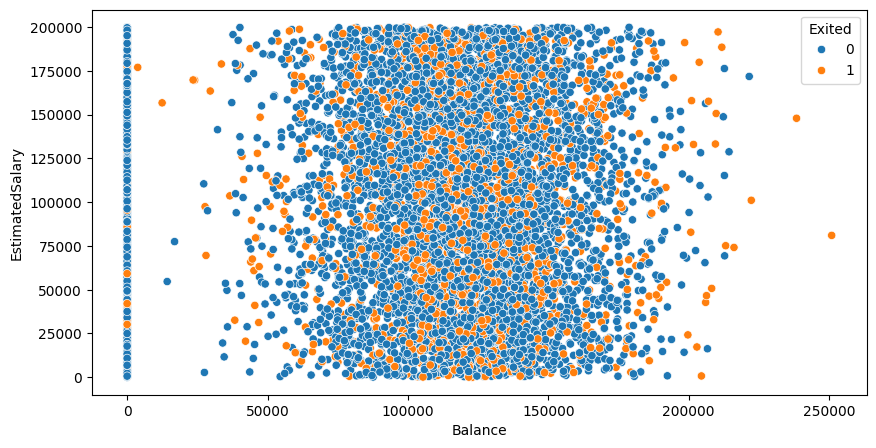

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_churn,x="Balance",y="EstimatedSalary",hue="Exited")
plt.show()

## No Patterns discovery

## CreditScore vs EstimatedSalary

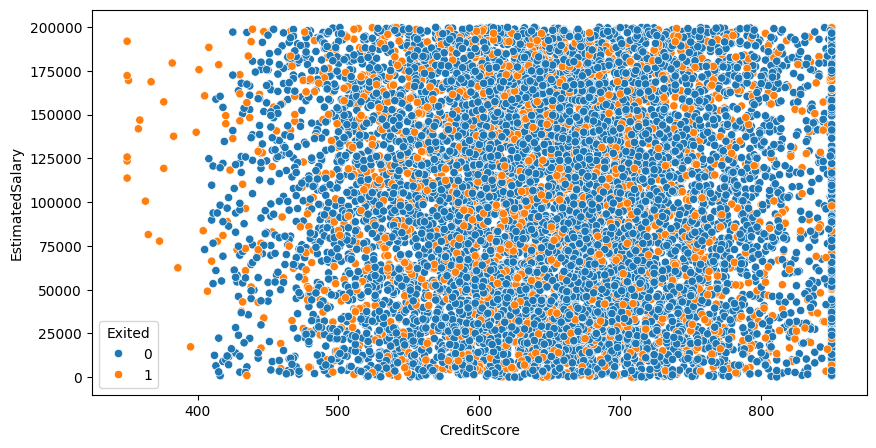

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_churn,x="CreditScore",y="EstimatedSalary",hue="Exited")
plt.show()

#### No Patterns

#### Balance vs CreditScore

In [17]:
(df_churn.query("Balance<=10000")["Exited"]==1).mean()

np.float64(0.1384742951907131)

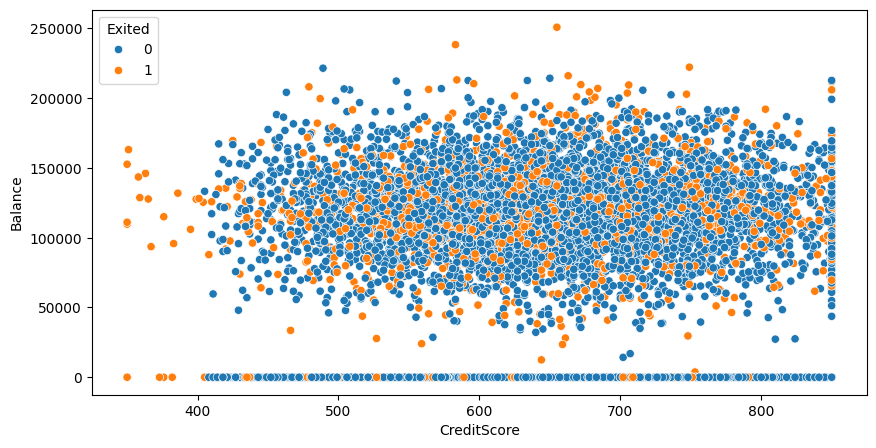

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_churn,x="CreditScore",y="Balance",hue="Exited")
plt.show()

## No pattern discovered.

#### Statistical Analysis

In [152]:
from sklearn.preprocessing import LabelEncoder
le_geo=LabelEncoder()
le_gen=LabelEncoder()
df_churn["GeographyX"]=le_geo.fit_transform(df_churn["Geography"])
df_churn["GenderX"]=le_geo.fit_transform(df_churn["Gender"])
data=df_churn.iloc[:,2:].drop(["Geography","Gender"],axis=1)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GeographyX,GenderX
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


In [156]:
data_corr=data.corr()
data_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GeographyX,GenderX
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.007888,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.022812,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003739,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.069408,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.003972,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.008523,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.006724,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.001369,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.035943,-0.106512
GeographyX,0.007888,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,1.000000,0.004719


In [161]:
np.abs(data_corr).Exited.sort_values(ascending=False)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
GenderX            0.106512
NumOfProducts      0.047820
GeographyX         0.035943
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
Name: Exited, dtype: float64

#### The most related features are Age, IsActiveMember, Balance, and Gender.

## End of EDA